In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # For visualizing missing value
import plotly.graph_objects as go # For Generating Graphs
import plotly.express as px # For Generating box plot for statistical representation
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
dataset = pd.read_csv('/content/gdrive/MyDrive/EECS731_IntroToDSAssignments/DSProject/processed_cleveland.csv')
dataset.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

dataset.isnull().sum()
dataset['target'] = dataset.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
dataset['sex'] = dataset.sex.map({0: 'female', 1: 'male'})
dataset['thal'] = dataset.thal.fillna(dataset.thal.mean())
dataset['ca'] = dataset.ca.fillna(dataset.ca.mean())
dataset['sex'] = dataset.sex.map({'female': 0, 'male': 1})


Mounted at /content/gdrive


# **Cleaning the data:**

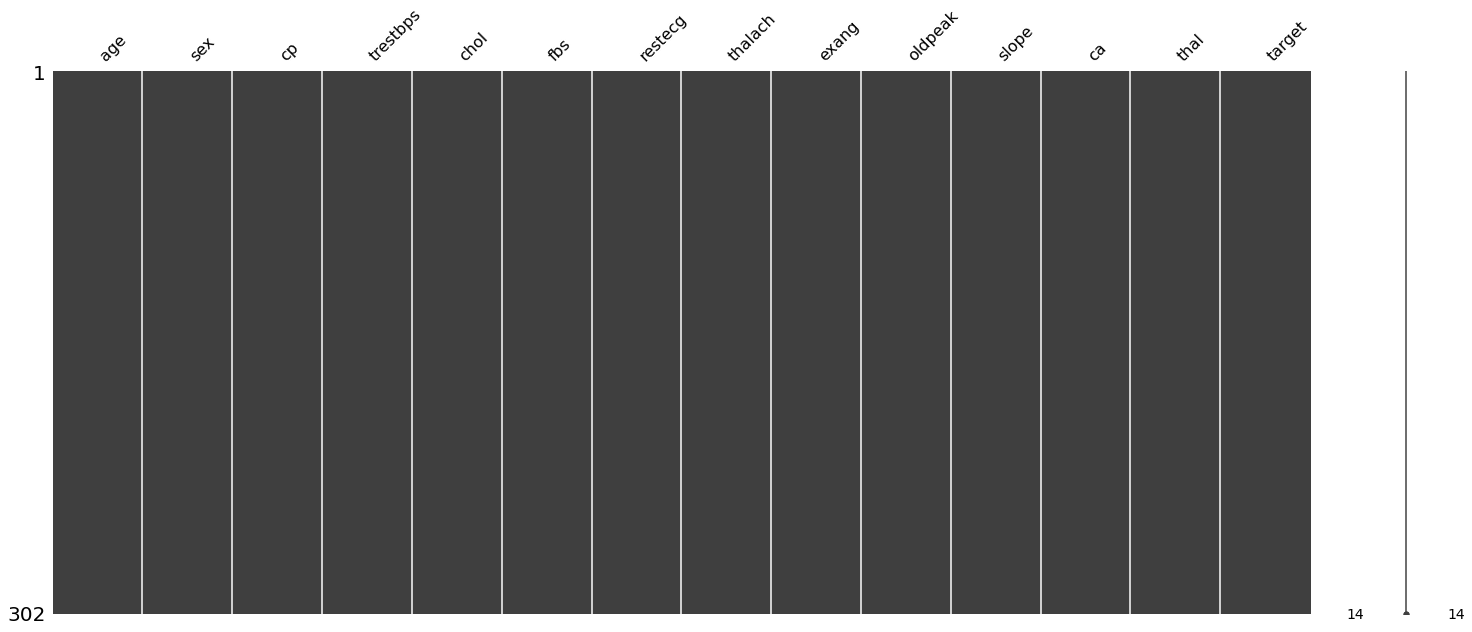

In [ ]:
#Cheking if there are any missing values
msno.matrix(dataset)

# **Box plots to analyze outliers:**

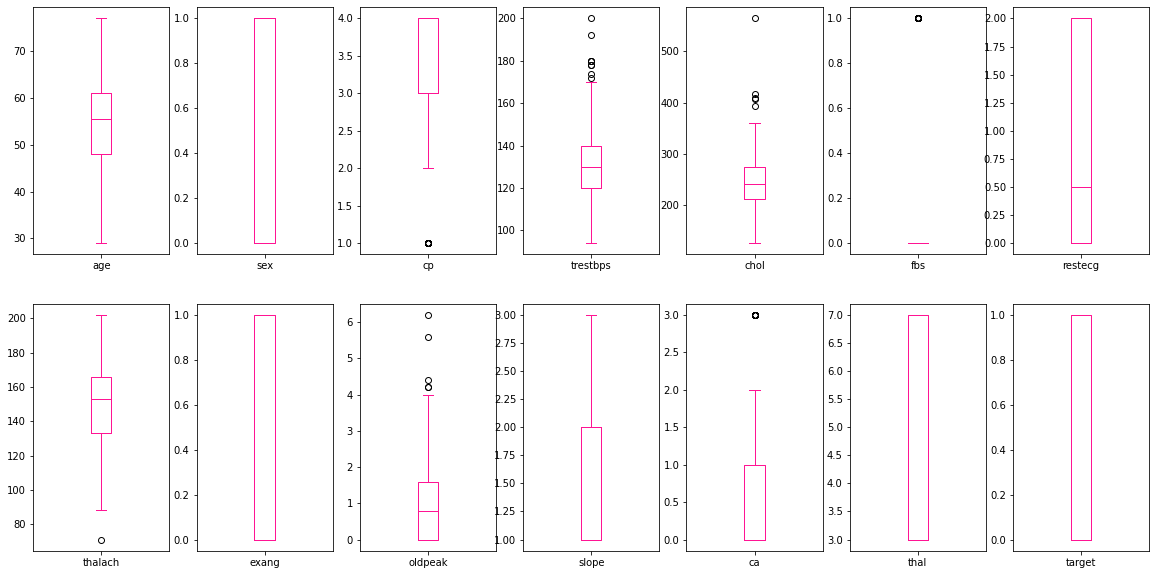

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10),
color='deeppink');

**Indentifying any removing outliers**

In [ ]:
# for continuous variable
import numpy as np
continous_variables = ['age','trestbps','chol','thalach','oldpeak']
def outliers(df_o, drop = False):
    for single_feature in df_o.columns:
        feature_data = df_o[single_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('Feature: {} ->, No of Outliers ={}'.format(single_feature, len(outliers)))
        if drop:
            dataset.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(single_feature))

outliers(dataset[continous_variables])

Feature: age ->, No of Outliers =0
Feature: trestbps ->, No of Outliers =9
Feature: chol ->, No of Outliers =5
Feature: thalach ->, No of Outliers =1
Feature: oldpeak ->, No of Outliers =5


In [ ]:
# droping outliers
outliers(dataset[continous_variables], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


# **Distribution of features:**

0    157
1    126
Name: target, dtype: int64


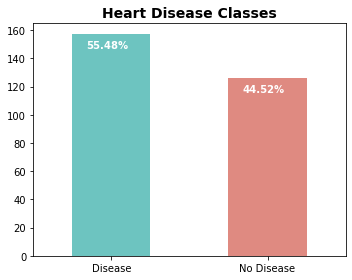

In [ ]:
#Distribution of target variable
print(dataset.target.value_counts())

fig, axis = plt.subplots(figsize=(5,4))
name = ["Disease", "No Disease"]
axis = dataset.target.value_counts().plot(kind='bar',color=['#6DC4C0','#DF8A81'])
axis.set_title("Heart Disease Classes", fontsize = 14, weight = 'bold')
axis.set_xticklabels (name, rotation = 0)

# calculating percentage
totals = []
for i in axis.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in axis.patches:
    axis.text(i.get_x()+.09, i.get_height()-10, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='white', weight = 'bold')

plt.tight_layout()

Text(0.5, 1.0, 'Age Distribution')

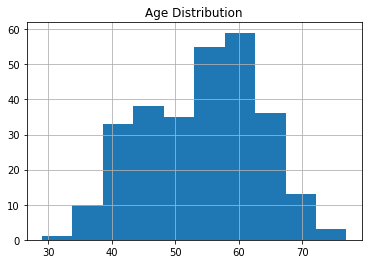

In [ ]:
#Distribution of age variable
dataset.age.hist().plot(kind= "bar")
plt.title("Age Distribution")

Text(0, 0.5, 'Age Distribution')

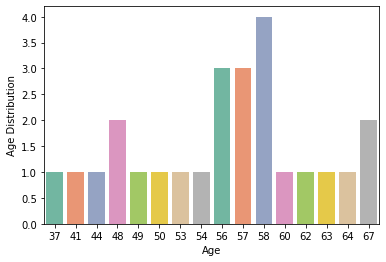

In [ ]:
#distribution of age in range 25
values = dataset.age[:25].value_counts()
sns.barplot(x=values.index,
y=values,
palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age Distribution')

In [ ]:
# Mean, minimum, maximum of Age variable
print("Mininum = ",min(dataset.age))
print("Maximum = ",max(dataset.age))
print("Mean = ",dataset.age.mean())

Mininum =  29
Maximum =  77
Mean =  54.03886925795053


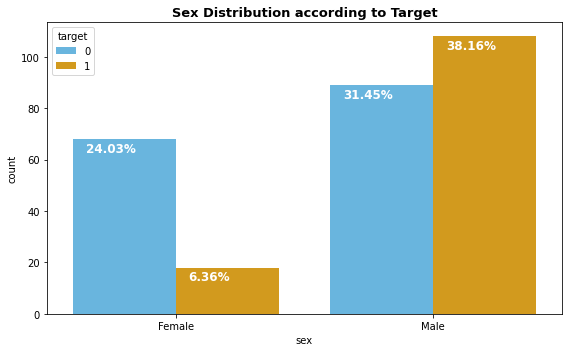

In [ ]:
# Distibution of gender variable
fig, ax = plt.subplots(figsize=(8,5))
name = ['Female', 'Male']
ax = sns.countplot(x=dataset.sex, hue=dataset.target, data=dataset, palette=["#56BBF1","#F0A500"])
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# calculating percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='white', weight = 'bold')
plt.tight_layout()

# **Correlation among the features:**

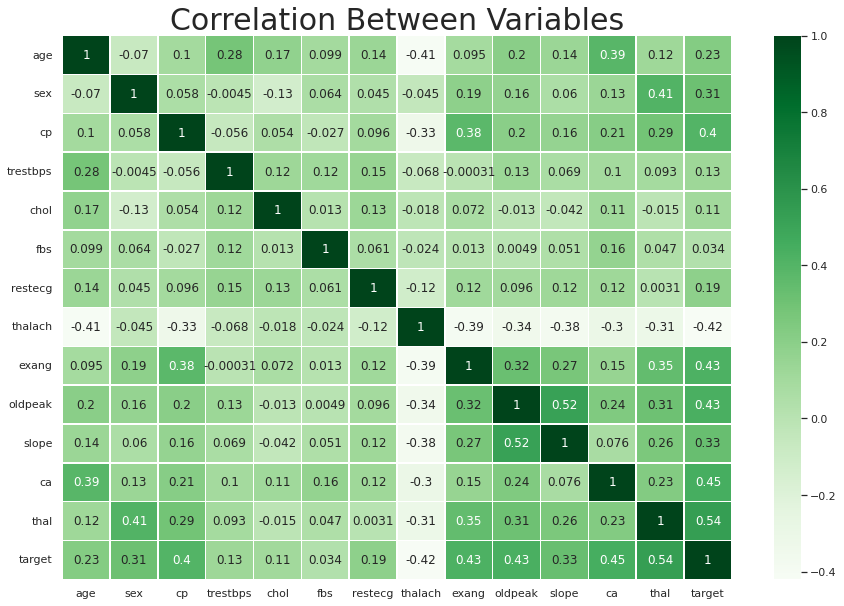

In [ ]:
sns.set(style="white")
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(dataset.corr(), annot = True, linewidths=.5, cmap="Greens")
plt.title('Correlation Between Variables', fontsize = 30)
plt.show()

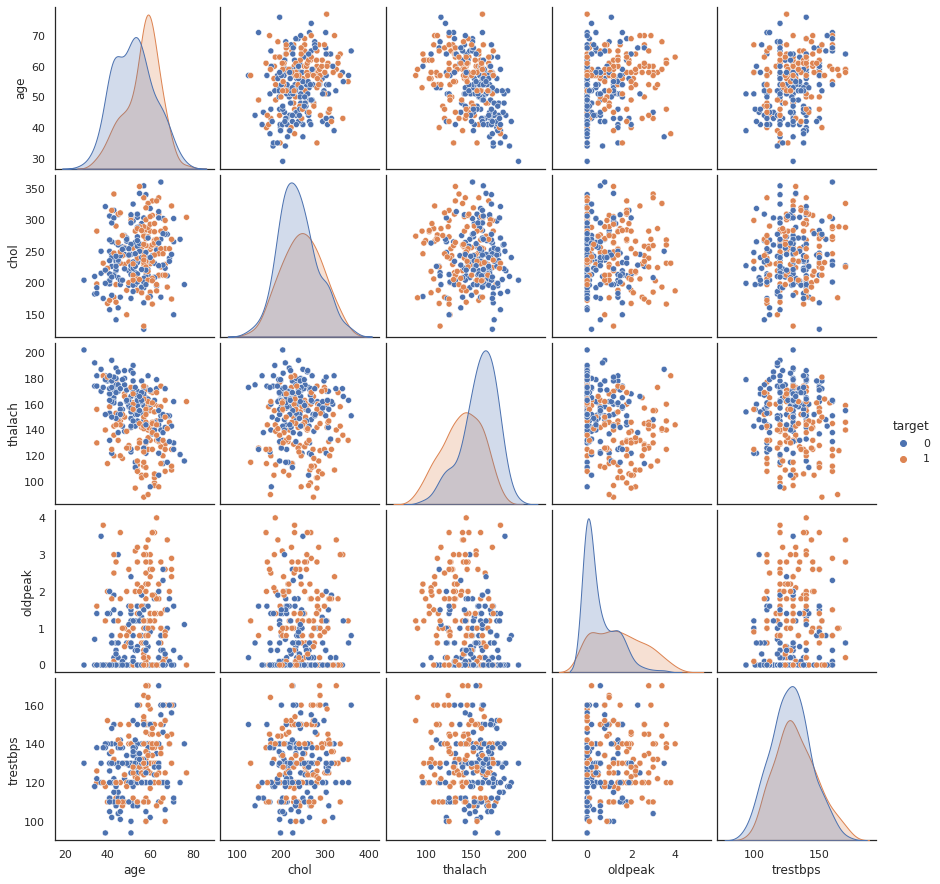

In [ ]:
import seaborn
seaborn.pairplot(dataset, hue ='target', vars=['age','chol','thalach','oldpeak','trestbps'])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset, title="Heart diseases EDA", html={'style':{'fullwidth':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Main Code**

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier


import warnings
warnings.filterwarnings('ignore')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_Train, X_Test, Y_Train, Y_Test=train_test_split(X,y,test_size=0.3,random_state=0)
from sklearn.preprocessing import StandardScaler as SS
SC = SS()
X_Train = SC.fit_transform(X_Train)
X_Test = SC.transform(X_Test)

print("\nGuassian NB")
GNB_Model = GaussianNB()
GNB_Model.fit(X_Train, Y_Train)
Gau_Pred = GNB_Model.predict(X_Test)
Accuracy=accuracy_score(Y_Test,Gau_Pred)
Accuracy_GNB=Accuracy*100
print(Accuracy_GNB)

print("\nSVM Classifier")
SVM_Model = SVC(kernel = 'linear',random_state=21)
SVM_Model.fit(X_Train, Y_Train)
SVM_Pred = SVM_Model.predict(X_Test)
Accuracy=accuracy_score(Y_Test,SVM_Pred)
Accuracy_SVM=Accuracy*100
print(Accuracy_SVM)

print("\nLogistic Regression")
LogReg_Model = LogisticRegression(random_state=1)
LogReg_Model.fit(X_Train, Y_Train)
LogReg_Pred = LogReg_Model.predict(X_Test)
Accuracy=accuracy_score(Y_Test,LogReg_Pred)
Accuracy_LR=Accuracy*100
print(Accuracy_LR)

print("\nNeural Network: MLP Classifier")
NNMLP_Model = MLPClassifier(random_state=1, max_iter=500,learning_rate_init=0.4)
NNMLP_Model.fit(X_Train, Y_Train)
NN_Pred = NNMLP_Model.predict(X_Test)
Accuracy=accuracy_score(Y_Test,NN_Pred)
Accuracy_NN=Accuracy*100
print(Accuracy_NN)

print("\nKNN Classifier")
KNN_Model= KNeighborsClassifier(n_neighbors=40,p=2)
KNN_Model.fit(X_Train, Y_Train)
KNN_Pred = KNN_Model.predict(X_Test)
Accuracy=accuracy_score(Y_Test,KNN_Pred)
Accuracy_NC=Accuracy*100
print(Accuracy_NC)

print("\nRandom Forest")
RandFor_Model = RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=0,max_depth=1)
RandFor_Model.fit(X_Train, Y_Train)
RanFor_Pred = RandFor_Model.predict(X_Test)
Accuracy=accuracy_score(Y_Test,RanFor_Pred)
Accuracy_RF=Accuracy*100
print(Accuracy_RF)




Guassian NB
85.71428571428571

SVM Classifier
87.91208791208791

Logistic Regression
87.91208791208791

Neural Network: MLP Classifier
89.01098901098901

KNN Classifier
90.10989010989012

Random Forest
90.10989010989012


In [ ]:
##### Ensembling #######
from sklearn.ensemble import VotingClassifier

Voting_Model= VotingClassifier(
    estimators=[('lr', LogReg_Model), ('svc', SVM_Model),('NN',NNMLP_Model),('KNN',KNN_Model),('GNB',GNB_Model),('RF', RandFor_Model)],
    voting='hard', weights=[1,1,2,2,2,1])
for Model in (LogReg_Model, SVM_Model,NNMLP_Model,KNN_Model,GNB_Model,RandFor_Model, Voting_Model):
    Model.fit(X_Train, Y_Train)
    Pred = Model.predict(X_Test)
    Accuracy=accuracy_score(Y_Test, Pred)*100
    print(Model.__class__.__name__,":",f'{Accuracy:.2f}''\n')
    if (Model.__class__.__name__ == "VotingClassifier"):
      Accuracy_VC=Accuracy

LogisticRegression : 87.91

SVC : 87.91

MLPClassifier : 89.01

KNeighborsClassifier : 90.11

GaussianNB : 85.71

RandomForestClassifier : 90.11

VotingClassifier : 91.21



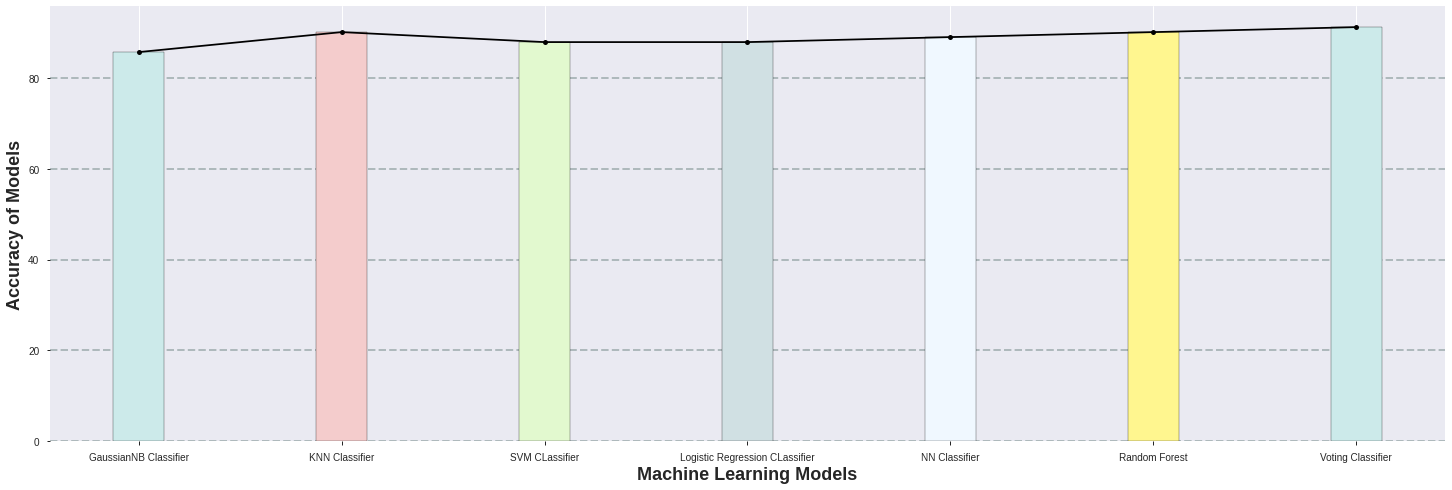

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 8))
Classifiers=[ "GaussianNB Classifier","KNN Classifier","SVM CLassifier", "Logistic Regression CLassifier","NN Classifier", "Random Forest","Voting Classifier"]
Accuracy = [Accuracy_GNB,Accuracy_NC,Accuracy_SVM,Accuracy_LR,Accuracy_NN,Accuracy_RF,Accuracy_VC]
plt.bar(Classifiers,Accuracy,color=['#cceaea','#f4cccc','#e2f9cf','#d0e0e3','#f0f8ff','#fff68f'],edgecolor='black',width=0.25)
plt.plot(Classifiers,Accuracy, marker='.', color='black', ms=10)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel("Machine Learning Models",fontweight='bold',fontsize='18')
plt.ylabel("Accuracy of Models",fontweight='bold',fontsize='18')
plt.show()